In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
data = pd.read_csv("https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv")
print(data.head(10))
print(data['btc_market_price'][1023])

        Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2/17/2010               0.0           2043200.0             0.0   
1  2/18/2010               0.0           2054650.0             0.0   
2  2/19/2010               0.0           2063600.0             0.0   
3  2/20/2010               0.0           2074700.0             0.0   
4  2/21/2010               0.0           2085400.0             0.0   
5  2/22/2010               0.0           2098150.0             0.0   
6  2/23/2010               0.0           2110700.0             0.0   
7  2/24/2010               0.0           2120200.0             0.0   
8  2/25/2010               0.0           2127600.0             0.0   
9  2/26/2010               0.0           2136100.0             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0            0.000235   
1               0.0              0.0            0.000241   
2               0.0              0.0            0

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

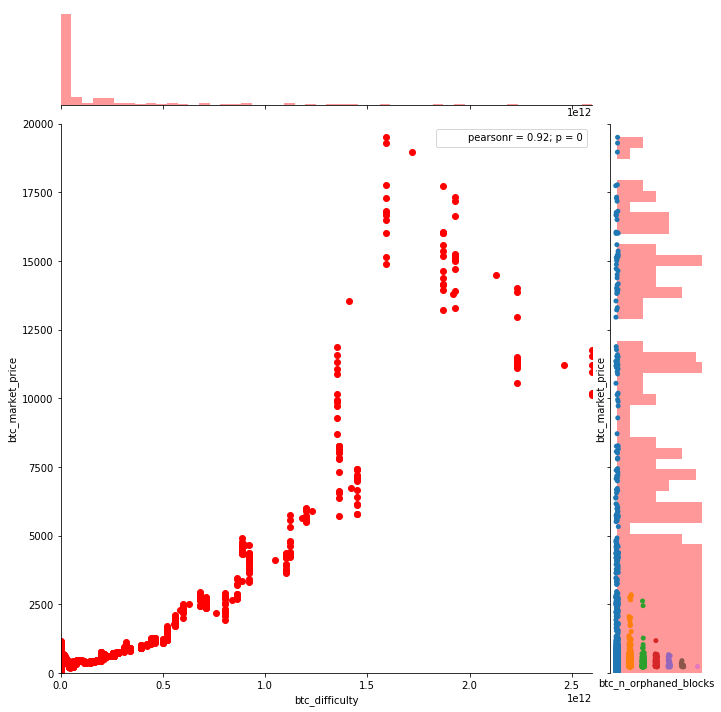

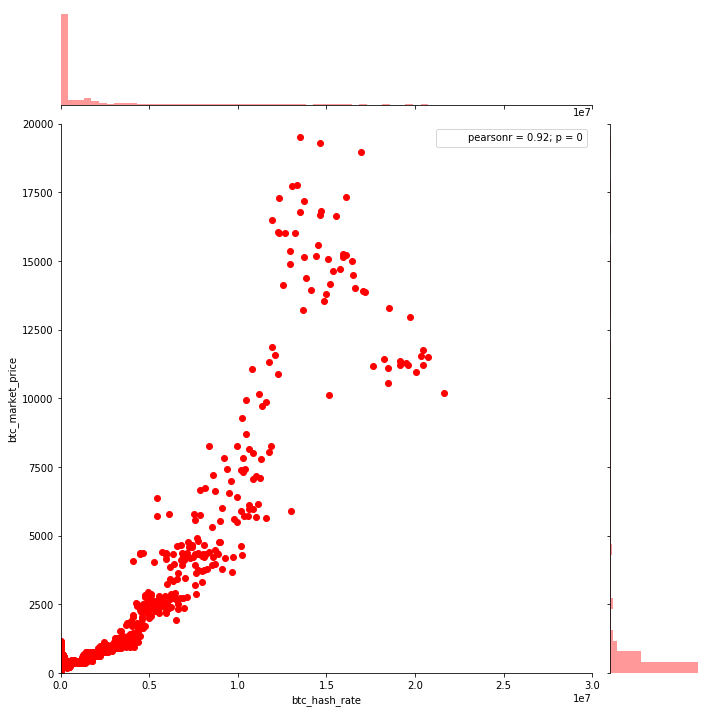

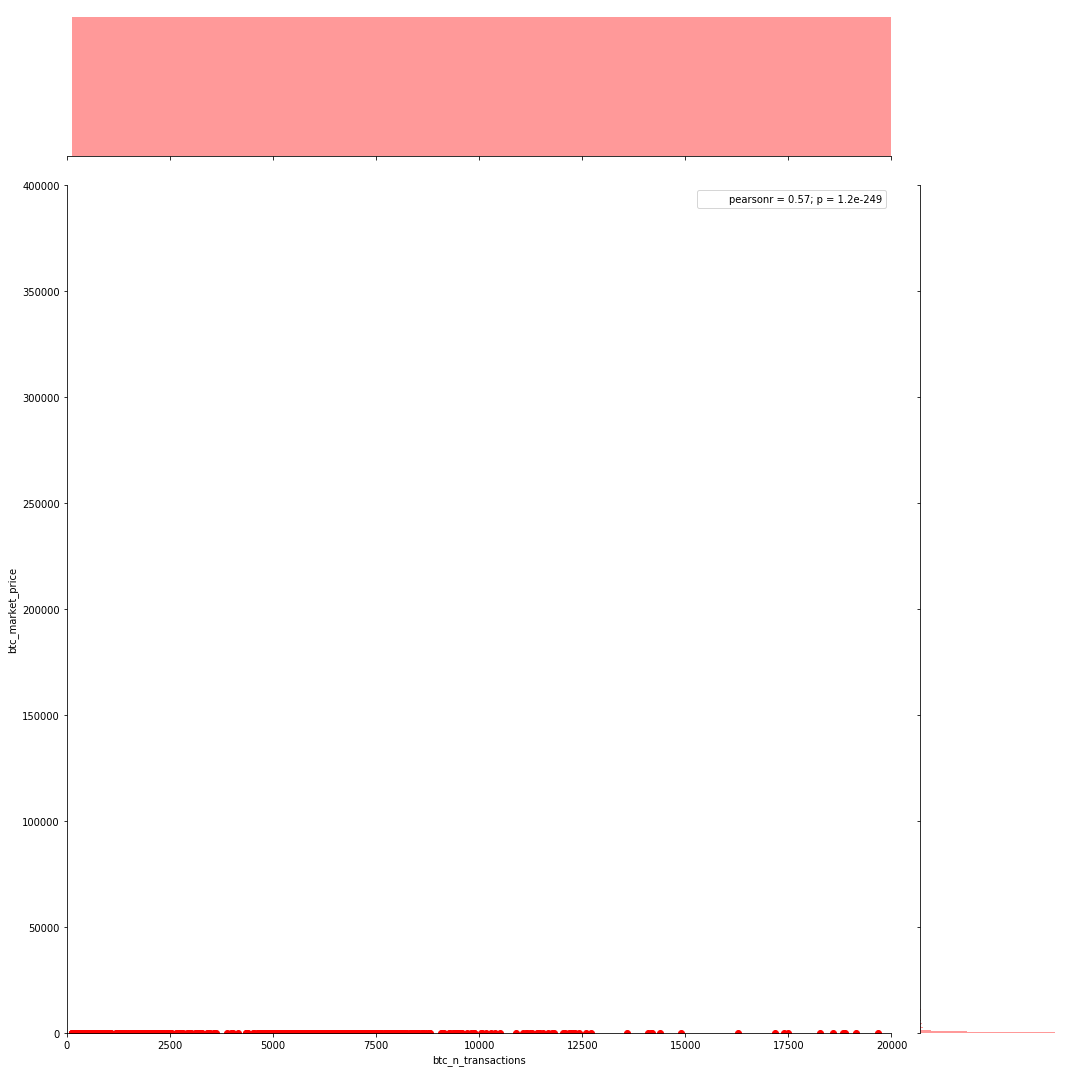

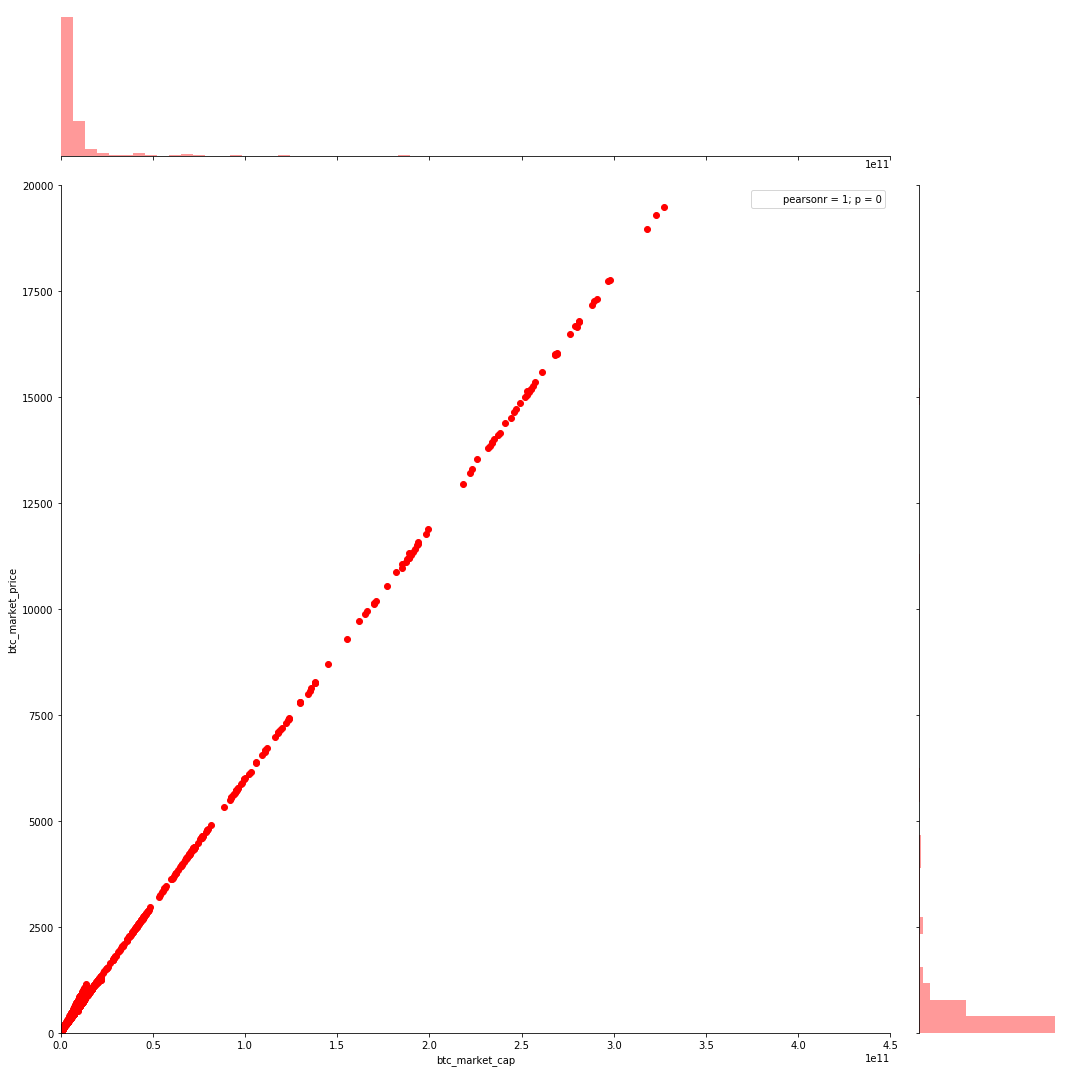

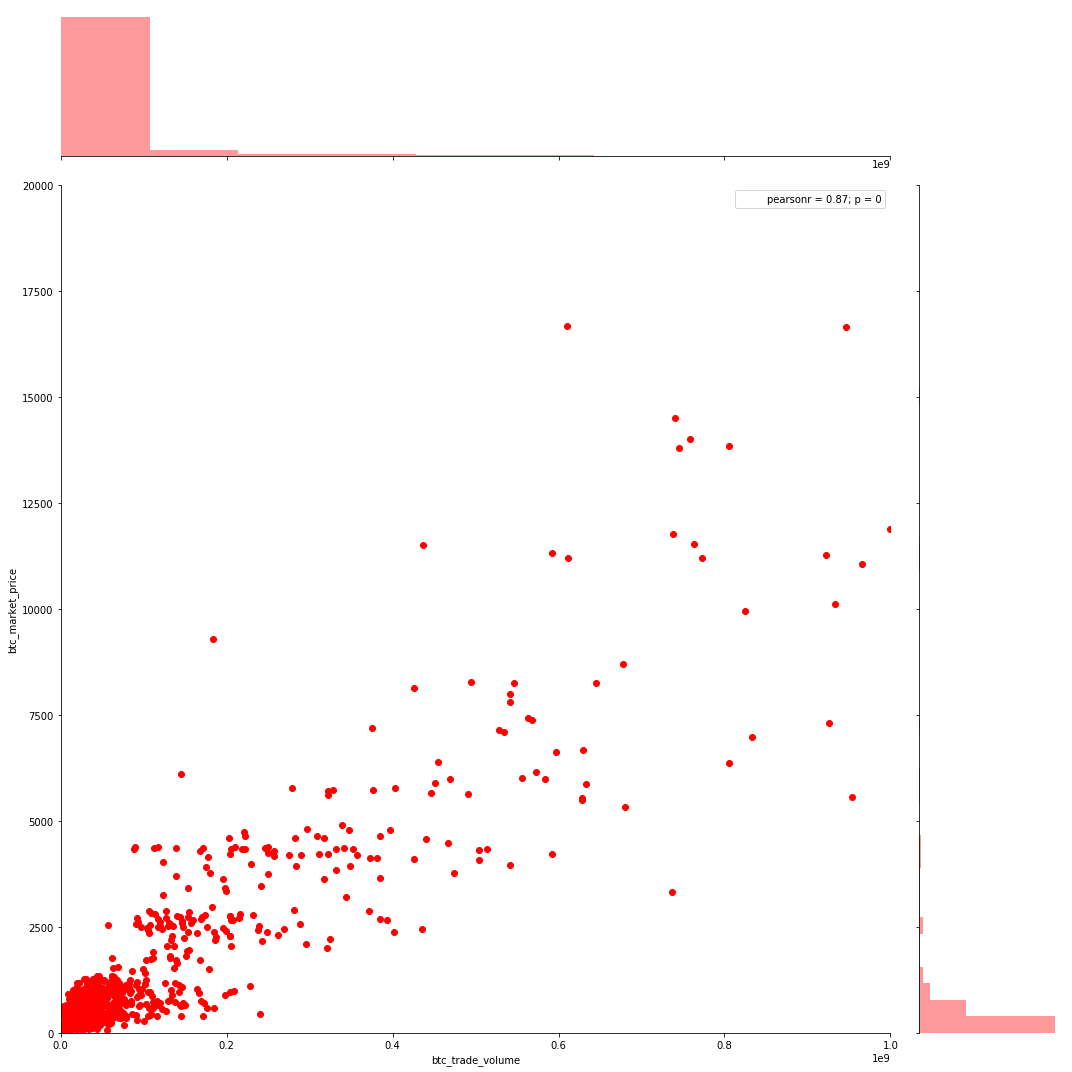

In [16]:
g = sns.jointplot("btc_difficulty","btc_market_price",data=data,xlim=(0,2.6E+12),ylim=(0,20000),color="r",size=10)
k = sns.stripplot(x="btc_n_orphaned_blocks",y="btc_market_price",data=data,jitter=True)
a = sns.jointplot( "btc_hash_rate", "btc_market_price", data=data, xlim=(0, 30000000), ylim=(0, 20000), color="r", size=10)
b = sns.jointplot("btc_n_transactions","btc_market_price", data=data, ylim=(0, 400000), xlim=(0, 20000), color="r", size=15)
c = sns.jointplot("btc_market_cap", "btc_market_price", data=data, xlim=(0, 450000000000), ylim=(0, 20000), color="r", size=15)
d = sns.jointplot("btc_trade_volume", "btc_market_price", data=data, xlim=(0, 1000000000), ylim=(0, 20000), color="r", size=15)

In [17]:
print(data['btc_trade_volume'].isnull().values.any())

True


In [18]:
data['btc_trade_volume'].fillna(data['btc_trade_volume'].median(),inplace=True)

In [19]:
data['btc_transaction_fees'].fillna(data['btc_trade_volume'].median(),inplace=True)
data['btc_difficulty'].fillna(data['btc_trade_volume'].mean(),inplace=True)

In [20]:
model = smf.ols(formula='btc_market_price ~ btc_market_cap + btc_n_transactions + btc_miners_revenue + btc_cost_per_transaction + btc_difficulty + btc_hash_rate + btc_cost_per_transaction_percent', data=data).fit()

In [21]:
y = model.predict(data[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

print("MSE:", sm.mean_squared_error(y, data['btc_market_price'].values))

MSE: 406.88775236184034


In [22]:
test = pd.read_csv('https://raw.githubusercontent.com/colaberry/data/master/Bitcoin/test_set.csv')

test_predict = model.predict(test[['btc_market_cap','btc_cost_per_transaction_percent','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate']])

for i in range(0,len(test_predict)):
    print("The price on "+ str(i+1) +" february is "+ str(test_predict[i]))

The price on 1 february is 9058.820544692699
The price on 2 february is 8899.56894588441
The price on 3 february is 9120.376415754628
The price on 4 february is 8466.205034946153
The price on 5 february is 6800.5360139571485
The price on 6 february is 7624.4932361088295
The price on 7 february is 8074.8250949153735
The price on 8 february is 8262.66205855358
The price on 9 february is 8560.43714797398
The price on 10 february is 8336.075524397056
The price on 11 february is 8427.027666246797
The price on 12 february is 8836.960274441835
The price on 13 february is 8624.403638979986
The price on 14 february is 9362.844680576738
